# Model Project

In [151]:
# Data Import
import numpy as np
import sympy as sm
import scipy as sp
from scipy import optimize
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps
import ipywidgets as widgets
import pyEdgeworthBox as eb

## Model Description
In this project we are going to solve a simple economic model: the consumer problem. In the first model we will look at an economy with only one consumer and two goods. The Consumer "A" has the utility function $u^A = x_1^a x_2^{1-a}$ and has the income $I^A$, and her budget constraint is therefore $I^A = p_1x_1 + p_2x_2$. Both goods can be consumed in continuous and in non-negative quantities. The model will be solved analytically with Sympy and numerically with SciPy. The solutions will be illustrated in a 2D and a 3D diagram.  

## 1. Analytical solution
Algorithms from SymPy are used in order to solve the model analytically by finding the optimal quantities of good 1 and 2 that maximize the consumer's utility. This is done in 4 steps: 

1) $x_2$ is isolated in the budget constraint.

2) The above found expression for $x_2$ is substituted into the utility function

3) The utility function now only consists of one unknown variable $x_1$, and so the derivative with respect to $x_1$ is taken

4) The optimal $x_1^*$ is found by isolating $x_1$

This procedure is then repeated, in order to find the optimal $x_2^*$

In [152]:
# defining all symbols
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
a = sm.symbols('a')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
IA = sm.symbols('I^A')

In [153]:
 # Defining all parameters to be strictly positive
for var in [p1,p2,a,IA]:
    sm.assume.global_assumptions.add(sm.Q.positive(var))
sm.assume.global_assumptions 

{Q.positive(I^A), Q.positive(a), Q.positive(p_1), Q.positive(p_2)}

In [154]:
# Defining objectives and budget constraint
objectiveA = x1**a*x2**(1-a)
budget_constraint_A = sm.Eq(p1*x1 + p2*x2,IA)

### Solving the consumer problem
Deriving optimal x1A:

In [155]:
x2_from_constrA = sm.solve(budget_constraint_A,x2) # isolating x2 in budget constraint
objective_subsA1 = objectiveA.subs(x2,x2_from_constrA[0]) # substituting x2 into utility function
foc_A1 = sm.diff(objective_subsA1,x1) # Deriving FOC
x1A_solution = sm.solve(sm.Eq(foc_A1,0),x1) # solving FOC
x1A_solution[0]

I^A*a/p_1

Deriving optimal x2A:

In [156]:
x1_from_constrA = sm.solve(budget_constraint_A,x1) 
objective_subsA2 = objectiveA.subs(x1,x1_from_constrA[0]) 
foc_A2 = sm.diff(objective_subsA2,x2) 
x2A_solution = sm.solve(sm.Eq(foc_A2,0),x2)
x2A_solution[0]

-I^A*(a - 1)/p_2

The optimal quantities have now been found, and we see that the demand is effected negatively by the price of the good, following the law of demand.

### Python functions
Python functions for the solutions are now created, as they can be used later on.

In [157]:
# Python fucntion for x1A 
_x1A_sol_func = sm.lambdify((p1,a,IA),x1A_solution)
def x1A_sol_func(p1=2,a=0.3,IA=80):
    return _x1A_sol_func(p1,a,IA)

# Python fucntion for x2A 
_x2A_sol_func = sm.lambdify((p2,a,IA),x2A_solution)
def x2A_sol_func(p2=3,a=0.3,IA=80):
    return _x2A_sol_func(p2,a,IA)

## 2. Numerical Solution
The same consumer problem is now solved numerically. This is done by using SciPy where the function "optimize.minimize" will be called. We will then compare the two methods, in order to show that the same results will be found.

In [158]:
# Assigning variables with numerical value
alpha = 0.5
I = 100 
p1 = 10 
p2 = 20 

In [159]:
# Defining the utility function
def utilityfunction(x1,x2,alpha):
    return (x1**alpha)*(x2**(1-alpha))

In [160]:
# Defining objectives
def objective(x,alpha,I,p1,p2):
    x1=x[0]
    x2=x[1]
    return -utilityfunction(x1,x2,alpha)

In [161]:
# Defining constraints
constraints=({'type':'ineq','fun':lambda x:I-p1*x[0]-p2*x[1]})

In [162]:
# Defining bounds and initial_guess
bnds1=(0,I/p1)
bnds2=(0,I/p2)
bounds=(bnds1,bnds2)
initial_guess = [I/p1/2,I/p2/2]

In [163]:
# Solving the minimization problem
sol = optimize.minimize(objective,initial_guess,args=(alpha,I,p1,p2),method='SLSQP',bounds=bounds,constraints=constraints)

In [164]:
def print_sol(x1,x2,u,I,p1,p2):
    print(f'x1 = {x1:.8f}')
    print(f'x2 = {x2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.8f}')

In [165]:
x1 = sol.x[0]
x2 = sol.x[1]
u = utilityfunction(x1,x2,alpha)
print_sol(x1,x2,u,I,p1,p2)

x1 = 5.00000000
x2 = 2.50000000
u  = 3.53553391
I-p1*x1-p2*x2 = 0.00000000


In [166]:
# Comparing with functions from sympy
print(x1A_sol_func(IA=100,p1=10,a=0.5))
print(x2A_sol_func(IA=100,p2=20,a=0.5))

[5.0]
[2.5]


It is hereby demonstrated that the consumer problem can be solved with both Sympy and Scipy as we get the same results when using the two different methods. 

## 3. Visualisation and further analysis
The demand for good 1 and 2 is given by the prices, the income share spent on each good and the total income. It is therefore relevant to look at how the demand varies according to these variables. This can be illustrated in both 2D and 3D diagrams.

### A 2D diagram of demand given by price
First we illustrate how the demand for the good is effected by the price in a 2D diagram. In order to demonstrate this, the price of good 1 is set to be between 0 and 10 with 100 spaces, and the price of good 2 to be between 0 and 5 also with 100 spaces. 

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: divide by zero encountered in true_divide


<function matplotlib.pyplot.show(*args, **kw)>

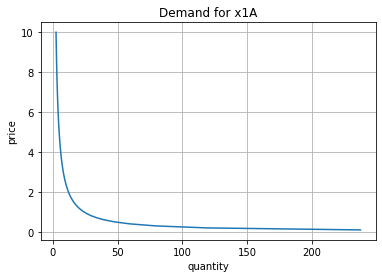

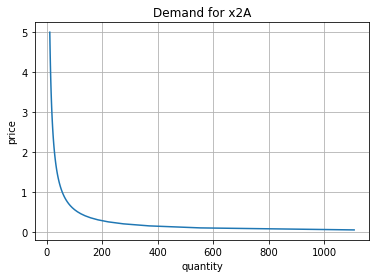

In [167]:
# assigning parameters with numerical values

p1_vec = np.linspace(0,10,100)
p2_vec = np.linspace(0,5,100)
a = 0,3
IA = 80

quantity_x1A = x1A_sol_func(p1_vec)
quantity_x2A = x2A_sol_func(p2_vec)

# Plotting the 2D diagrams

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Demand for x1A')
ax.set_xlabel('quantity')
ax.set_ylabel('price')
ax.grid(True)
ax.plot(quantity_x1A[0],p1_vec)
plt.show

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Demand for x2A')
ax.set_xlabel('quantity')
ax.set_ylabel('price')
ax.grid(True)
ax.plot(quantity_x2A[0],p2_vec)
plt.show

We have now visualized the law of demand, as the graph illustrates that demand increases as the price decreases.

### A 3D diagram of demand given by price and share of income spent on good
The income share spent on each good, also has a large impact on how much of the good is demanded. It is therefore relevant to look at a 3D diagram, in order to show how this parameter also effects the demand.

/Users/emma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/emma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


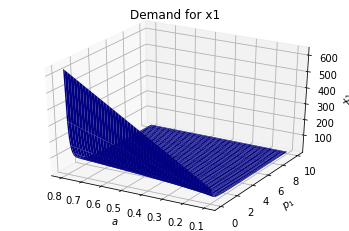

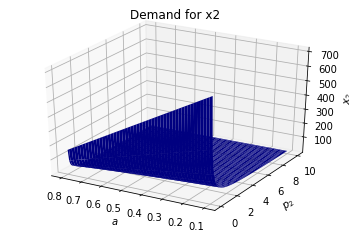

In [168]:
# Demand for x1
def x1_opt(a,p1,IA=80):
    return (IA*a)/p1

p1_vec = np.linspace(0,10,100)
a = np.linspace(0.1,0.8,100)
a_grid,p1_vec_grid = np.meshgrid(a,p1_vec,indexing='ij')
demand_grid = x1_opt(a_grid,p1_vec_grid)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(a_grid,p1_vec_grid,demand_grid,cmap=cm.jet)


# adding title and labels
ax.set_title("Demand for x1")
ax.set_xlabel('$a$')
ax.set_ylabel('$p_1$')
ax.set_zlabel('$x_1$')

# inverting the axis
ax.invert_xaxis()


# Demand for x2
def x2_opt(a,p2,IA=80):
    return (-IA*(a-1))/p2


p2_vec = np.linspace(0,10,100)
a = np.linspace(0.1,0.8,100)
a_grid,p2_vec_grid = np.meshgrid(a,p2_vec,indexing='ij')
demand_grid = x2_opt(a_grid,p2_vec_grid)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(a_grid,p2_vec_grid,demand_grid,cmap=cm.jet)


# adding title and labels
ax.set_title("Demand for x2")
ax.set_xlabel('$a$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$x_2$')

# inverting the axis
ax.invert_xaxis()

As it is also seen from the 2D figure, the demand for both goods increase as the price decreases. However, we also see that the demand for $x_1$ increases as $a$ increases, and the opposite for $x_2$. The reason being, that $a$ is the income share spent on $x_1$ and $1-a$ is the income share spent on $x_2$. 

## 4. Expanding the model to a pure exchange economy
We will now expand the economy to consist of 2 agents: Consumer A and consumer B. The consumers have their own preferences, and they are represented by the following utility functions:

$U^A = x_1^a x_2^{(1-a)}$

$U^B = x_1^b x_2^{(1-b)}$

We assume that the agents each have the endownments: 

$e^A = (7,12)$ 

$e^B = (18,13)$. 


The steps from the previous consumer problem will be repeated, but now the condition which states that the allocation must be possible is implemented:

$x_1^{A*} +x_1^{B*} = e_1^A + e_1^B$

As we are finding the walras equilibrium in an exchange economy, the price of good 1 is set to be numeraire.

In [169]:
# defining all symbols
x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
a = sm.symbols('a')
b = sm.symbols('b')
p1 = 1
p2 = sm.symbols('p_2')
e1A = 7
e2A = 12
e1B = 18
e2B = 13

objectiveA = x1**a*x2**(1-a)
objectiveB = x1**b*x2**(1-b)
budget_constraint_A = sm.Eq(p1*x1 + p2*x2,p1*e1A + p2*e2A)
budget_constraint_B = sm.Eq(p1*x1 + p2*x2,p1*e1B + p2*e2B)

In [170]:
# Consumer A's opt x1 when p1=1
x2_from_constrA = sm.solve(budget_constraint_A,x2) # isolating x2 in budget constraint
objective_subsA1 = objectiveA.subs(x2,x2_from_constrA[0]) # substituting x2 into utility function
foc_A1 = sm.diff(objective_subsA1,x1) # Deriving FOC
x1A_solution = sm.solve(sm.Eq(foc_A1,0),x1) # solving FOC
x1A_solution[0]

a*(12*p_2 + 7)

In [171]:
# Consumer B's opt x1 when p1=1
x2_from_constrB = sm.solve(budget_constraint_B,x2) 
objective_subsB1 = objectiveB.subs(x2,x2_from_constrB[0])
foc_B = sm.diff(objective_subsB1,x1) 
x1B_solution = sm.solve(sm.Eq(foc_B,0),x1)
x1B_solution[0]

b*(13*p_2 + 18)

In [172]:
# Forfilling the condition which states that the allocation must be possible
poss = sm.Eq(x1A_solution[0]+x1B_solution[0],e1A + e1B)
p2_walras = sm.solve(poss,p2)
p2_walras[0]

(-7*a - 18*b + 25)/(12*a + 13*b)

In [105]:
# Substituting p2_walras into optimal x1A
x1A_walras = x1A_solution[0].subs(p2,p2_walras[0])
x1A_walras

a*(7 + 12*(-7*a - 18*b + 25)/(12*a + 13*b))

In [173]:
# Substituting p2_walras into optimal x1B
x1B_walras = x1B_solution[0].subs(p2,p2_walras[0])
x1B_walras

b*(18 + 13*(-7*a - 18*b + 25)/(12*a + 13*b))

We have now found the walras equlibrium in the exchange economy. We can now plot the demand in a 3D diagram, to illustrate how the demand is effected by the variables. 

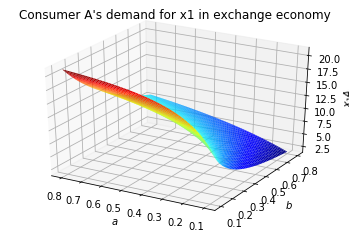

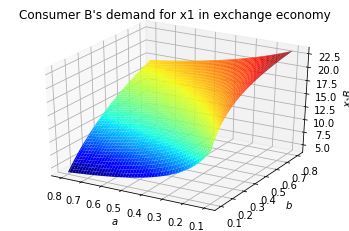

In [174]:
# Demand for x1A
def x1A_opt_walras(a,b):
    return a*(7+(12*(-7*a-18*b+25))/(12*a+13*b))

a = np.linspace(0.1,0.8,100)
b = np.linspace(0.1,0.8,100)
a_grid,b_grid = np.meshgrid(a,b,indexing='ij')
demand_walras_grid = x1A_opt_walras(a_grid,b_grid)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(a_grid,b_grid,demand_walras_grid,cmap=cm.jet)


# adding title and labels
ax.set_title("Consumer A's demand for x1 in exchange economy")
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.set_zlabel('$x_1A$')

# inverting the axis
ax.invert_xaxis()



# Demand for x1B
def x1B_opt_walras(a,b):
    return b*(18+(13*(-7*a-18*b+25))/(12*a+13*b))
    
a = np.linspace(0.1,0.8,100)
b = np.linspace(0.1,0.8,100)
a_grid,b_grid = np.meshgrid(a,b,indexing='ij')
demand_walras_gridB = x1B_opt_walras(a_grid,b_grid)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(a_grid,b_grid,demand_walras_gridB,cmap=cm.jet)


# adding title and labels
ax.set_title("Consumer B's demand for x1 in exchange economy")
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
ax.set_zlabel('$x_1B$')

# inverting the axis
ax.invert_xaxis()

The first figure illustrates that consumer A's demand for $x_1$ increases the lower b is and the higher a is. The second figure illustrates that consumer B's demand for $x_1$ the higher value b has, and the lower value a has.

# 5. Edgeworth box
We are now going to plot the edgeworth box and thereby also numerically calculate the walras equilibrium. The edgeworth box illustrates the equilibrium in the above pure exchange economy, when $\alpha = 0.3$ and $b = 0.6$. 

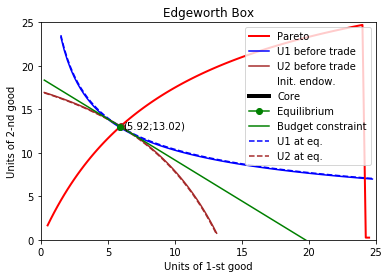

In [175]:
EB=eb.EdgeBox(  u1 = lambda x_1,x_2: x_1**0.3*x_2**0.7
              , u2 = lambda x_1,x_2: x_1**0.6*x_2**0.4
              , IE1 = [7,12]
              , IE2 = [18,13])
EB.plot()

In [139]:
# double checking with our solution
x1A_opt_walras(a=0.3,b=0.6)

5.921052631578948

In [180]:
p2_walras_ex = (-7*0.3-18*0.6+25)/(12*0.3+13*0.6)
p2_walras_ex

1.06140350877193

In [182]:
x2_opt_walras = (12*p2_walras_ex-x1A_opt_walras(a=0.3,b=0.6)+7)/p2_walras_ex
x2_opt_walras

13.016528925619834

We see that the equilibrium can be solved with both solutions, as we reach the same results.

# 6. Conclusion
In this project we have solved the simple economic model of a consumer problem by applying model analysis methods. First, we have solved an economic model with only one consumer and 2 goods both analytically and numerically. The solutions have been illustrated in 2D and 3D diagrams, visualizing how the demand is effected by the parameters. We have then extended the model to an exchange economy, consisting of two consumers with different preferences. This extended model is again solved with Sympy and the demand is analyzed by illustrating the effects of the paramaters in a 3D diagram. Last but not least, we have illustrated this equilibrium in an edgeworth box and thereby also solved the problem numerically. We concluded that this equilibrium could be solved with both methods.